# Setup

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# model
from dictionary_helpers import build_glove_dict
from tweet_processings import build_tweet_vector
from sklearn.neighbors import KNeighborsClassifier

# hyperparameter optimization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# submission 
from create_csv_submission import create_csv_submission
import time
import datetime

# other
import numpy as np 
import os

# change path if necessary
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project2'
sys.path.insert(0,my_path + r'/code/COMMON')

# Load Glove model from Stanford

In [3]:
# adapt path
os.chdir(r'D:/Documents/etudes/epfl/MA1/cours/MachineLearning/Project2/data/twitter_datasets_stanford/')

In [4]:
# filename
filename_glove_dict = 'glove.twitter.27B.100d.txt'

# build glove embeddings dictionary
glove = build_glove_dict(filename_glove_dict)

# Load stop words

In [5]:
# adapt path
os.chdir(r'D:/Documents/etudes/epfl/MA1/cours/MachineLearning/Project2/data/stop_words/')

In [6]:
# filename to read
filename_stopwords = 'stop_word_freq_min_100_ratio_marg_0.1.txt'

# build stop word list
stop_words = []
with open(filename_stopwords, 'r', encoding='utf-8-sig') as f:
    for line in f:
        stop_words.append(line.lstrip().split()[0])
    del stop_words[-1]
    
print("File :", filename_stopwords)
print("Number of stop words :", len(stop_words))

File : stop_word_freq_min_100_ratio_marg_0.1.txt
Number of stop words : 630


# Load tfidf 

In [7]:
# adapt path
os.chdir(r'D:/Documents/etudes/epfl/MA1/cours/MachineLearning/Project2/data/tfidf/')

In [8]:
# filename to read
filename_tfidf = 'tfidf.txt'

# build tfidf weights dictionary
tfidf = {}
with open(filename_tfidf, 'r', encoding='utf-8-sig') as f:
    next(f) # skip headers
    for line in f:
        word = line.strip().split()[0]
        tf = float(line.strip().split()[1])
        idf = float(line.strip().split()[2])
        tfidf[word] = [tf, idf]

# Define tweet vector method

In [9]:
# adapt path
os.chdir(r'D:/Documents/etudes/epfl/MA1/cours/MachineLearning/Project2/code/tom/')

In [11]:
# method to build tweet vector ("mean" and "tfidf")
method = ["mean"]

# Build tweet vectors TRAIN
Use the short tweet collection for the hyper-parameter optimization.

In [12]:
# adapt path
os.chdir(r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project2\data\twitter_datasets_epfl\short')

In [13]:
# build positive tweet feature set
X_pos = []
with open('train_pos_processed.txt') as f:
    for line in f:
        tweet = line.lstrip().split()
        tweet_vector = build_tweet_vector(tweet, glove, tfidf, stop_words, method)
        if len(tweet_vector):
            X_pos.append(tweet_vector)
            
# transform to an array     
X_pos = np.array(X_pos)

'lisining to music' is an empty tweet.
'off to burgerboys' is an empty tweet.
'walmart with mommiiee' is an empty tweet.
'off to walmart' is an empty tweet.
'up with andy' is an empty tweet.
'with deanza' is an empty tweet.
'going to crowely' is an empty tweet.


In [14]:
# build negative tweet feature set
X_neg = []
with open('train_neg_processed.txt') as f:
    for line in f:
        tweet = line.lstrip().split()
        tweet_vector = build_tweet_vector(tweet, glove, tfidf, stop_words, method)
        if len(tweet_vector):
            X_neg.append(tweet_vector)
            
# transform to an array           
X_neg = np.array(X_neg) 

'enough' is an empty tweet.
'im thinking too much' is an empty tweet.
'kgnbgtini hugmepleaseprince ~' is an empty tweet.
'scoiled my tongue' is an empty tweet.
'so insanly busy' is an empty tweet.
'<number><number> philly' is an empty tweet.
'willy willy willy willy' is an empty tweet.


In [15]:
# build labels
y_pos = np.ones(X_pos.shape[0])
y_neg = -np.ones(X_neg.shape[0])

In [23]:
# number of training samples
N_samples_train = -1

# cut samples
X_pos_cut = X_pos[:N_samples_train,:]
X_neg_cut = X_neg[:N_samples_train,:]

# cut targets
y_pos_cut = y_pos[:N_samples_train]
y_neg_cut = y_neg[:N_samples_train]

# concatenate
X_pos_neg = np.concatenate([X_pos_cut, X_neg_cut])
y_pos_neg = np.concatenate([y_pos_cut, y_neg_cut])

# Hyperparameter optimization: K 

## Grid search and cross validation

In [ ]:
# data
X = X_pos_neg
y = y_pos_neg

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# range for hyperparameters
K_range = np.arange(1,)

# Set the parameters by cross-validation
tuned_parameters = [{'n_neighbors': K_range}]
                    
# define grid search CV
clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring= 'accuracy', verbose=1)

# fit for every parameters combinations in grid search CV
clf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


## Display results

In [20]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
    
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'n_neighbors': 100}

Grid scores on development set:

0.701 (+/-0.010) for {'n_neighbors': 100}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

       -1.0       0.74      0.65      0.69      2523
        1.0       0.68      0.77      0.72      2477

avg / total       0.71      0.71      0.70      5000




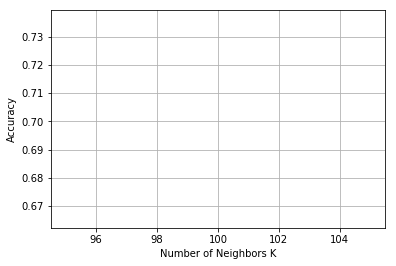

In [21]:
scores = clf.cv_results_['mean_test_score']

plt.figure()
plt.plot(K_range, scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.grid()

In [21]:
# save figure
plt.savefig('KNN_cross_validation_Kmax_20.jpeg')

In [22]:
scores

array([ 0.7008])

In [36]:
scores_all = np.array([ 0.65665333,  0.63030667,  0.67570667,  0.66216   ,
        0.68606667,  0.67672   ,  0.69314667,  0.68678667,  0.69753333,  0.69344   ,
        0.70041333,  0.69634667,  0.70292   ,  0.70026667,  0.70632   ,
        0.70354667,  0.7072    ,  0.7064    ,  0.70928   ,  0.7068    ,  
        0.70957333,  0.70805333,  0.71104   ,  0.70933333,
        0.71134667,  0.71125333,  0.71245333,  0.71249333,  0.71370667,
        0.71314667,  0.71338667,  0.71450667,  0.71489333,  0.71488   ])

K_range_all = range(1,scores_all.shape[0]+1)

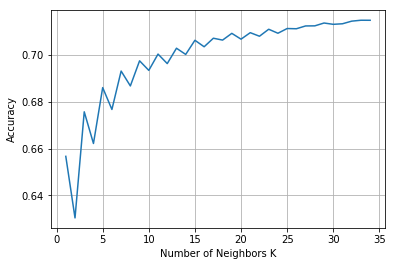

In [37]:
plt.figure()
plt.plot(K_range_all, scores_all)
plt.xlabel('Number of neighbors K')
plt.ylabel('Accuracy')
plt.gbid()

array([   50,   100,  1000,  5000, 10000])